In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

/Users/deonkumar/Desktop/Development/Python Playground/HOML/env/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X, y = mnist["data"], mnist["target"]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

---
### 5-detector

In [9]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [22]:
sample_digit = X.iloc[0]
sgd_clf.predict([sample_digit])

/Users/deonkumar/Desktop/Development/Python Playground/HOML/env/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [24]:
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [27]:
from sklearn import metrics
metrics.confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [28]:
metrics.precision_score(y_train_5, y_train_pred), metrics.recall_score(y_train_5, y_train_pred)

(0.8370879772350012, 0.6511713705958311)

In [29]:
metrics.f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [30]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [33]:
import matplotlib.pyplot as plt
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    #highlight the threshold, add the legend, axis label and grid
    plt.plot([3370, 3370], [0., 0.9], "r:")
    plt.grid(True)

                                       

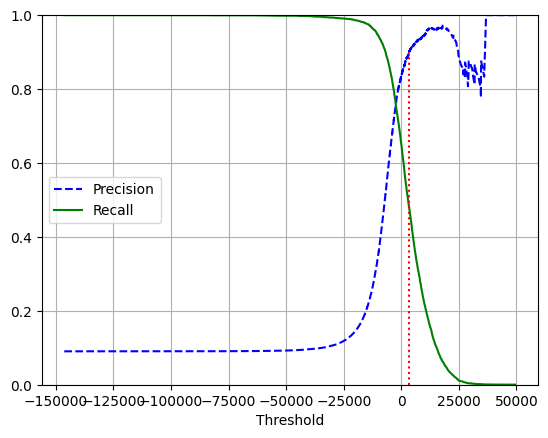

In [34]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

---
### Multilabel classification

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
y_train_large = (y_train.astype("int") >= 7)
y_train_odd = (y_train.astype("int") % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [4]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [5]:
some_digit = X.iloc[0]
knn_clf.predict([some_digit])

/Users/deonkumar/Desktop/Development/Python Playground/HOML/env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [6]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
metrics.f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

---
### Exercises

**Q.1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).**

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = classifier.predict(X_test)
# check accuracy
print(accuracy_score(y_test, y_pred))

0.9688


In [12]:
# do grid search on weights and n_neighbors
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[2,3,4,5,6,7,8,9],
            'weights':['uniform', 'distance']}
knn = KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_